In [21]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL 
epochs=40
batch_size = 32
train_dir = os.getcwd() + "/10_class_dataset"


CATEGORIES = [str(i) for i in range(10)] #Simple initial category

IMG_SIZE = 50 # Big enough?



        
 

In [22]:
image_gen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2
                    )

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='sparse',
                                                     subset='training')
                                                     


val_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='sparse',
                                                 subset='validation')

Found 2760 images belonging to 10 classes.
Found 680 images belonging to 10 classes.


In [23]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt


model = Sequential() 

model.add(Conv2D(32, (3,3), input_shape = (50, 50, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 10 neurons, for 10 classes
model.add(Dense(10))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy"
              ,optimizer="adam"
              ,metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_19 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)         

In [24]:
history = model.fit(train_data_gen, validation_data=val_data_gen, epochs=epochs,
                    steps_per_epoch = train_data_gen.samples // batch_size,
                    validation_steps = val_data_gen.samples // batch_size,)

Train for 86 steps, validate for 21 steps
Epoch 1/40
86/86 [==============================] - 8s 93ms/step - loss: 1.9362 - accuracy: 0.2944 - val_loss: 1.8196 - val_accuracy: 0.4583
Epoch 2/40
86/86 [==============================] - 7s 83ms/step - loss: 1.0344 - accuracy: 0.6551 - val_loss: 1.4162 - val_accuracy: 0.6176
Epoch 3/40
86/86 [==============================] - 10s 113ms/step - loss: 0.5396 - accuracy: 0.8317 - val_loss: 0.9961 - val_accuracy: 0.7113
Epoch 4/40
86/86 [==============================] - 10s 118ms/step - loss: 0.3411 - accuracy: 0.8961 - val_loss: 0.8002 - val_accuracy: 0.7292
Epoch 5/40
86/86 [==============================] - 10s 119ms/step - loss: 0.2461 - accuracy: 0.9216 - val_loss: 0.5619 - val_accuracy: 0.8125
Epoch 6/40
86/86 [==============================] - 10s 113ms/step - loss: 0.1582 - accuracy: 0.9505 - val_loss: 0.4453 - val_accuracy: 0.8616
Epoch 7/40
86/86 [==============================] - 10s 114ms/step - loss: 0.1140 - accuracy: 0.9608 - v

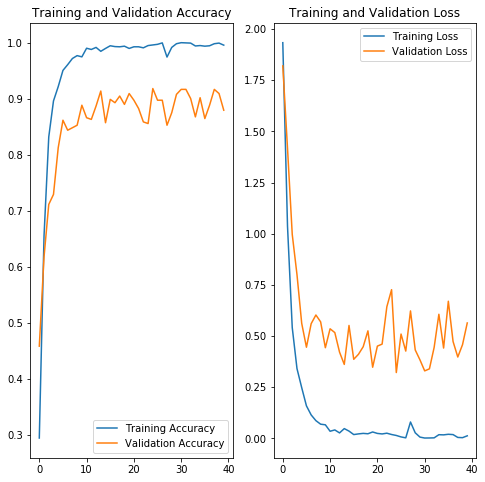

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()